In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"clean travel data.csv")
df.head() 

,Unnamed: 0,Package,Package Original Price,Package Discount %,City,Hotel Rating,Activity,Days,Nights
0,0,Exclusive Deal of TIH Grand Him Queen with Bre...,1998,50,Mcleodganj,3,DealsSuperior Room With BreakfastOffer valid t...,2,1
1,1,Exclusive Deal of Snow Valley Resorts Shimla w...,4375,20,Manali,4,DealsA Standard Room With Breakfast In A 4-Sta...,3,2
2,2,Exclusive Deal of Sandhya Resort & Spa Manali ...,7692,35,Manali,4,DealsSanitized Deluxe Room Inclusive Of Breakf...,4,3
3,3,Shimla: The Gem In Himachalâs Crown,5435,8,Shimla,3,Picturesque sightsNatureHill stationReligiousA...,3,2
4,4,Exhilarating Manali Tour Package From Chennai,5801,9,Manali,4,Naggar CastleNatureHadimba Devi TempleHill sta...,4,3


In [3]:
df.columns

Index(['Unnamed: 0', 'Package', 'Package Original Price', 'Package Discount %',
       'City', 'Hotel Rating', 'Activity', 'Days', 'Nights'],
      dtype='object')

In [4]:
df.drop(columns=["Unnamed: 0"],inplace=True)
df.head()

,Package,Package Original Price,Package Discount %,City,Hotel Rating,Activity,Days,Nights
0,Exclusive Deal of TIH Grand Him Queen with Bre...,1998,50,Mcleodganj,3,DealsSuperior Room With BreakfastOffer valid t...,2,1
1,Exclusive Deal of Snow Valley Resorts Shimla w...,4375,20,Manali,4,DealsA Standard Room With Breakfast In A 4-Sta...,3,2
2,Exclusive Deal of Sandhya Resort & Spa Manali ...,7692,35,Manali,4,DealsSanitized Deluxe Room Inclusive Of Breakf...,4,3
3,Shimla: The Gem In Himachalâs Crown,5435,8,Shimla,3,Picturesque sightsNatureHill stationReligiousA...,3,2
4,Exhilarating Manali Tour Package From Chennai,5801,9,Manali,4,Naggar CastleNatureHadimba Devi TempleHill sta...,4,3


In [5]:
df.columns

Index(['Package', 'Package Original Price', 'Package Discount %', 'City',
       'Hotel Rating', 'Activity', 'Days', 'Nights'],
      dtype='object')

### Univariate 

##### 1. Analyze the distribution of Package Original Price.

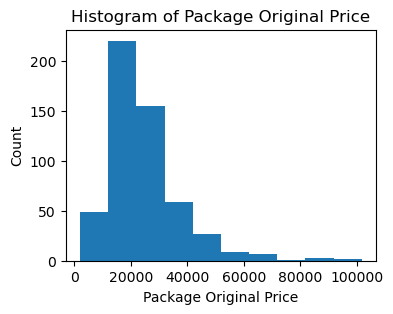

In [7]:
plt.figure(figsize=(4,3))
plt.hist(df['Package Original Price'])
plt.title(f'Histogram of {'Package Original Price'}')
plt.xlabel('Package Original Price')
plt.ylabel('Count')
plt.show()

##### 2.Analyze the outliers inside the days column.

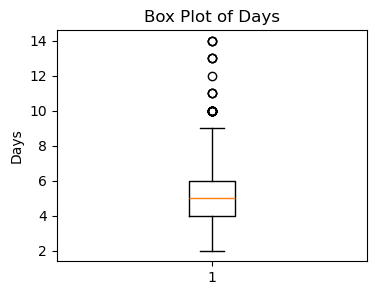

In [8]:
plt.figure(figsize=(4,3))
plt.boxplot(df['Days'])
plt.title(f'Box Plot of {'Days'}')
plt.ylabel('Days')
plt.show()

##### 3. Analyse the Hotel Rating.

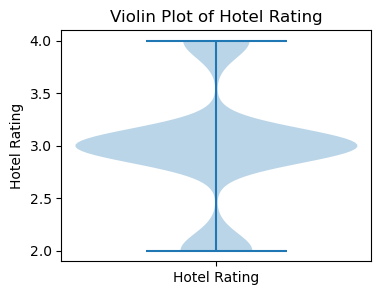

In [13]:
plt.figure(figsize=(4,3))
plt.violinplot(df['Hotel Rating'])
plt.title('Violin Plot of Hotel Rating')
plt.ylabel('Hotel Rating')
plt.xticks([1], ['Hotel Rating'])
plt.show()

##### 4. Analyze the distribution of Nights.

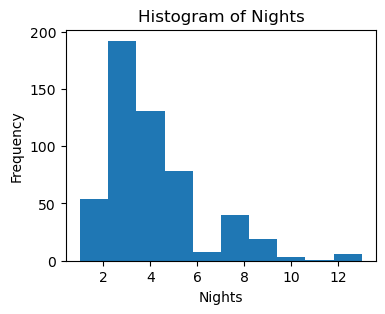

In [14]:
plt.figure(figsize=(4,3))
plt.hist(df['Nights'])
plt.title(f'Histogram of {'Nights'}')
plt.xlabel('Nights')
plt.ylabel('Frequency')
plt.show()

##### 5. Analyze the most popular travel destinations.

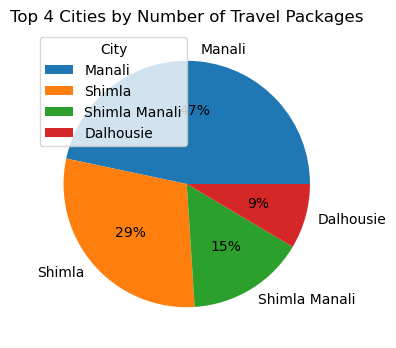

In [26]:
plt.figure(figsize=(4,4))

top_10_cities = df['City'].value_counts().head(4)
plt.pie(top_10_cities.values,labels=top_10_cities.index,autopct='%1.0f%%')

plt.title('Top 4 Cities by Number of Travel Packages')
plt.legend(title='City')
plt.show()

### Bivariate Analysis

##### 6. How does Hotel Rating affect the Package Original Price?

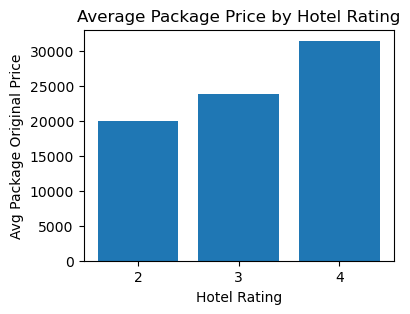

In [16]:
pivot_table = pd.pivot_table(df,values='Package Original Price',index='Hotel Rating',aggfunc=['mean', 'min', 'max', 'count'])

mean_prices = pivot_table['mean']['Package Original Price']

plt.figure(figsize=(4,3))
plt.bar(mean_prices.index.astype(str), mean_prices.values)
plt.title('Average Package Price by Hotel Rating')
plt.xlabel('Hotel Rating')
plt.ylabel('Avg Package Original Price')
plt.show()

##### 7. What is the relationship between Number of Days and Package Original Price?

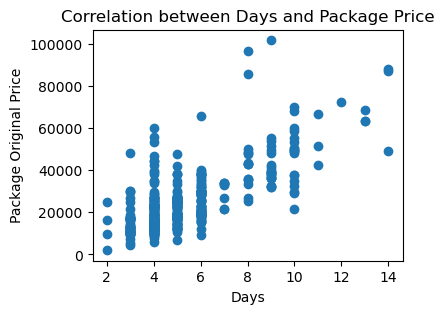

In [17]:
plt.figure(figsize=(4,3))
plt.scatter(df['Days'], df['Package Original Price'])
plt.title('Correlation between Days and Package Price')
plt.xlabel('Days')
plt.ylabel('Package Original Price')
plt.show()

##### 8. How are travel packages distributed across different Hotel Ratings for each City?

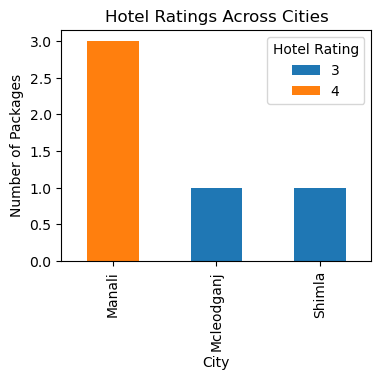

In [18]:
crosstab_df = pd.crosstab(df['City'],df['Hotel Rating'].head(5))
crosstab_df.plot(kind='bar',stacked=True,figsize=(4,3))

plt.title('Hotel Ratings Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Packages')
plt.legend(title='Hotel Rating')
plt.show()